In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)
df["target"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
from sklearn.model_selection import train_test_split

In [18]:
y=df.target
X=df.drop(["target"],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
model.score(X_test,y_test)

0.9333333333333333

In [23]:
y_predicted= model.predict(X_test)
from sklearn.metrics import confusion_matrix
cn= confusion_matrix(y_test,y_predicted)
cn

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  8]], dtype=int64)

Text(33.0, 0.5, 'Truth')

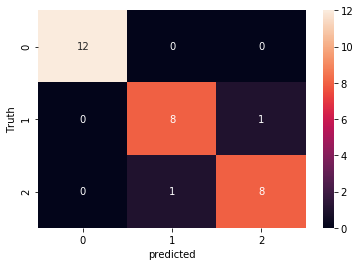

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cn,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")